In [1]:
from PIL import ImageGrab
import numpy as np
import matplotlib.pyplot as plt

In [295]:
import hackymouse
import time
bb = []
def setBB():
    print("move mouse to upper left hand corner")
    time.sleep(3)
    x, y = hackymouse.getPos()
    bb[:] = [x, y, x + 768, y + 768]
setBB()

move mouse to upper left hand corner


In [246]:
def takeVideo(n):
    times = []
    images = []
    for _ in range(n):
        times.append(time.time())
        images.append(ImageGrab.grab(bb))
    return np.array(times), np.array([np.array(u) for u in images])

def takeShot():
    return np.sum(np.array(ImageGrab.grab(bb), dtype=np.float64), 2)
#out2 = takeVideo(400)


In [227]:
gout2 = np.array(np.sum(out2[1], 3), dtype = np.float64)
def show(i):
    plt.imshow(i, interpolation="none")
    plt.colorbar()
    plt.show()

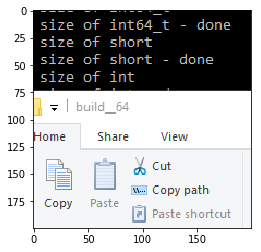

In [14]:
g = np.array(ImageGrab.grab([100, 100, 300, 300
                        ]))
plt.imshow(g)
plt.show()

In [5]:
import hackymouse

In [19]:
import pickle

In [21]:
pickle.dump(out, open("video2", "wb"))

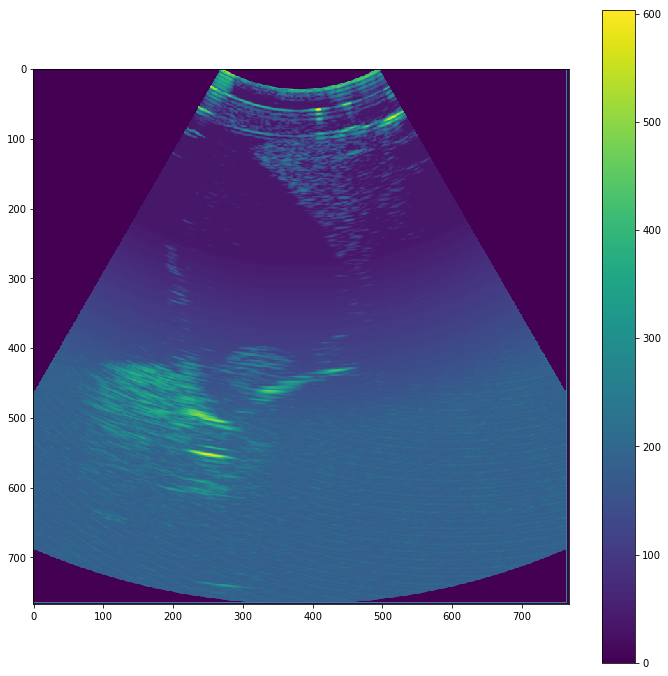

In [234]:
plt.imshow(gout2[200])
plt.colorbar()
plt.show()

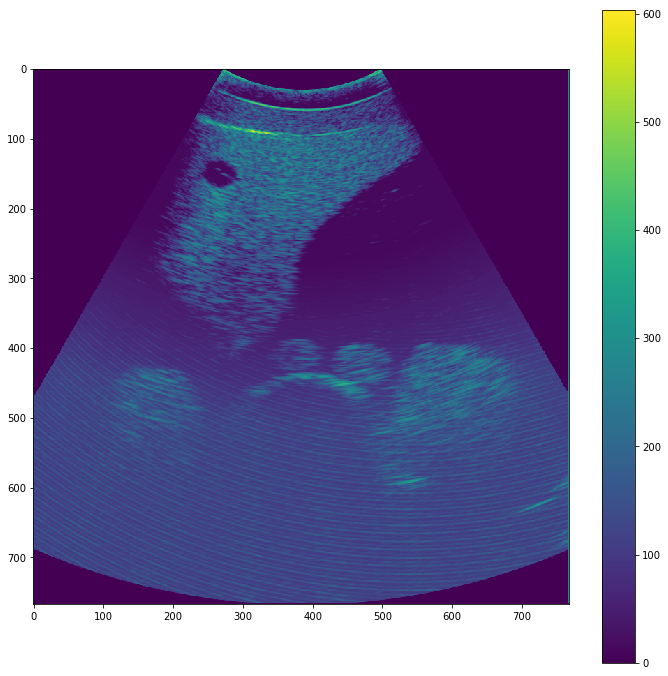

In [78]:
plt.imshow(gout[200])
plt.colorbar()
plt.show()

In [31]:
gout = np.sum(out, 3)

In [33]:
gout.shape

(400, 768, 768)

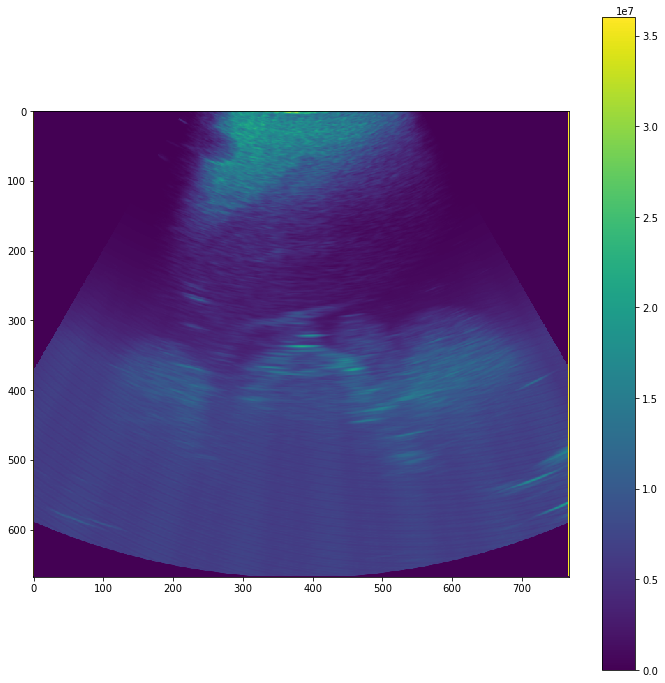

In [76]:
plt.imshow(np.sum((gout**2)[:, 100:], 0))
plt.colorbar()
plt.show()

In [59]:
import matplotlib

In [61]:
matplotlib.rcParams["figure.figsize"] = [12, 12]

In [75]:
np.max(gout)

672

In [232]:
i = gout1[200]
j = gout2[200]

In [92]:
i

array([[ 300.,    0.,    0., ...,    0.,    0.,  300.],
       [ 300.,    0.,    0., ...,    0.,    0.,  300.],
       [ 300.,    0.,    0., ...,    0.,    0.,  300.],
       ..., 
       [ 300.,    0.,    0., ...,    0.,    0.,  300.],
       [ 300.,  300.,  300., ...,  300.,  300.,  300.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

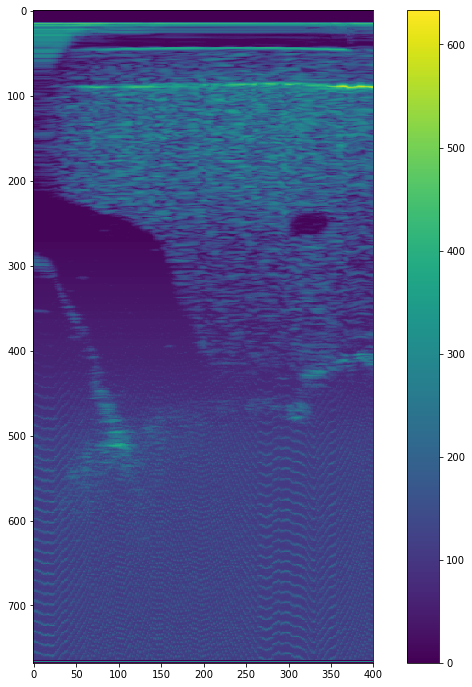

In [129]:
show(gout[: ,:, 300].transpose())

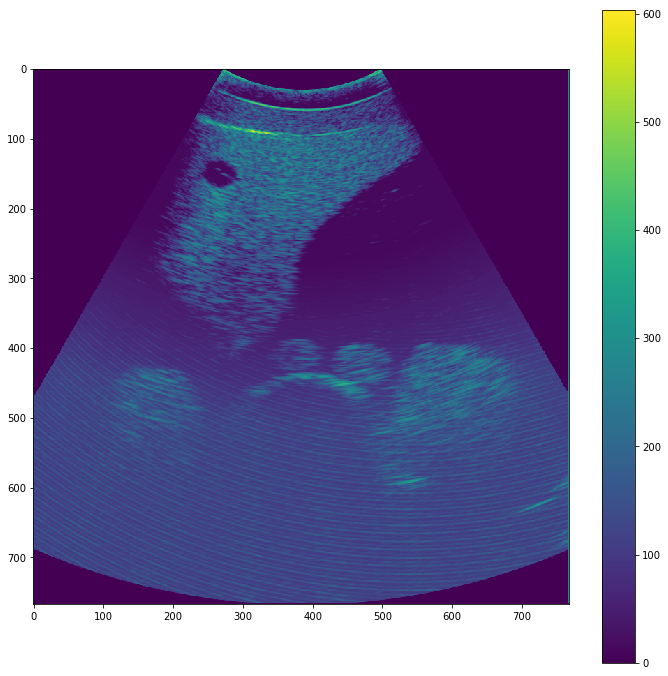

In [110]:
show(i)

In [209]:
j = gout[201]

In [131]:
import numpy.fft as fft

In [201]:
ihat = fft.fft(i, axis=0)
jhat = fft.fft(j, axis=0)

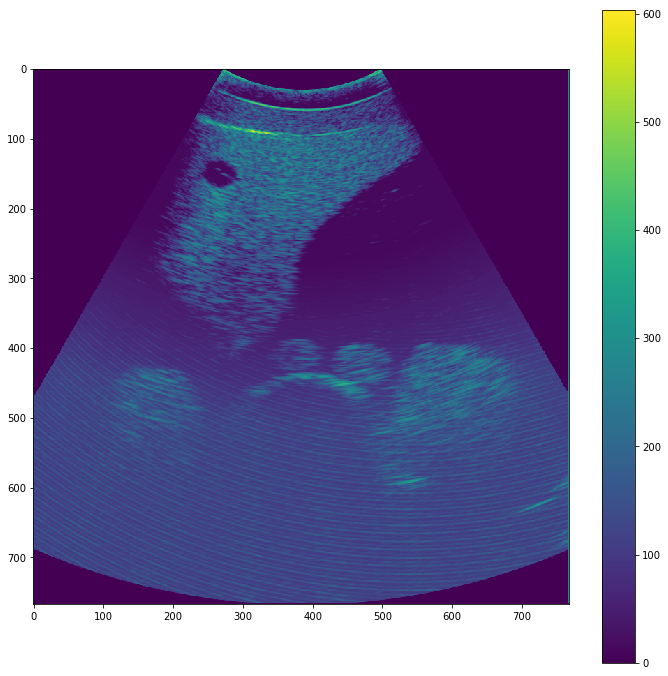

In [193]:
show(np.abs(fft.ifft(ihat, axis=0)))

In [253]:
def findCorrespondance(i1, i2):
    i1hat = fft.fft(i1, axis=0)
    i2hat = fft.fft(i2, axis=0)

    def compare(x, y):
        thing = i1hat[:, x] * np.conj(i2hat[:, y])
        res = np.real(fft.ifft(thing / (np.abs(thing) + .0000001)))
        """print(res)
        plt.plot(res)
        plt.show()"""
        return np.max(res)
    return np.array([[compare(x, y) for x in range(600)]for y in range(600)])

In [205]:
compare(200, 200)

0.52561913841326513

In [210]:
vals2 = np.array([[compare(x, y) for x in range(600)]for y in range(600)])

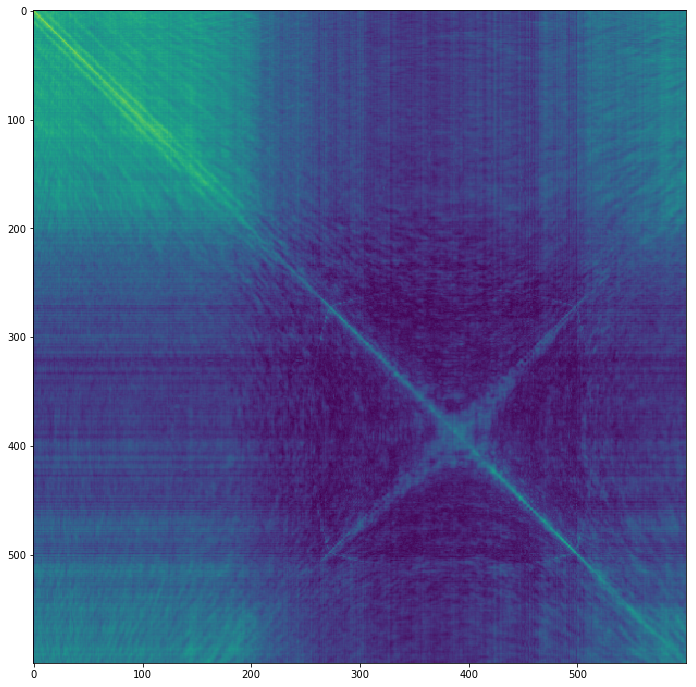

In [208]:
plt.imshow(vals)
plt.show()

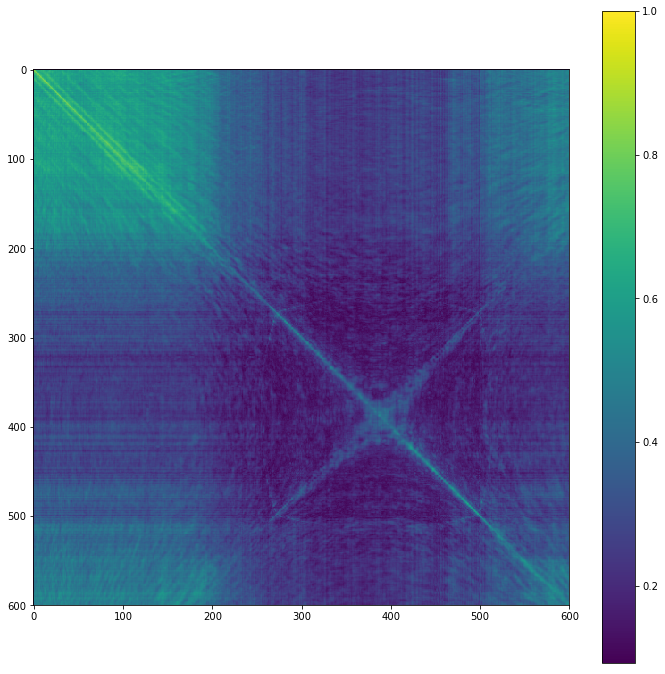

In [211]:
show(vals2)

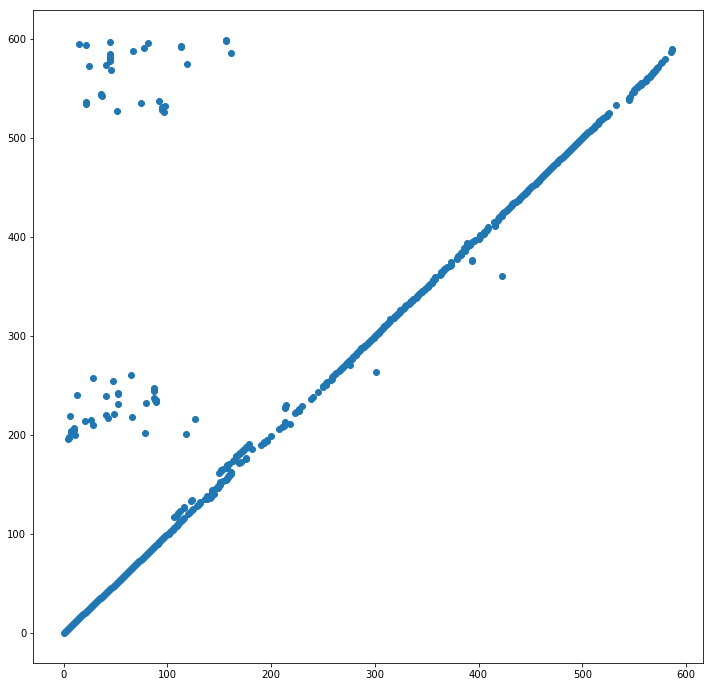

In [217]:
plt.scatter(np.argmax(vals, 0), np.arange(600))
plt.show()

In [237]:
################ Time to test it out
motion = pickle.load(open("C:/d/pythonGames/phoneGyroTrack/1498601746.846953", "rb"))
motion[0]

{'alpha': 68.50708006218751,
 'beta': 0.324351161438524,
 'gamma': -0.4557169152984646,
 'time': 1498601453.505}

In [242]:
alpha = np.array([float(x["alpha"]) for x in motion])

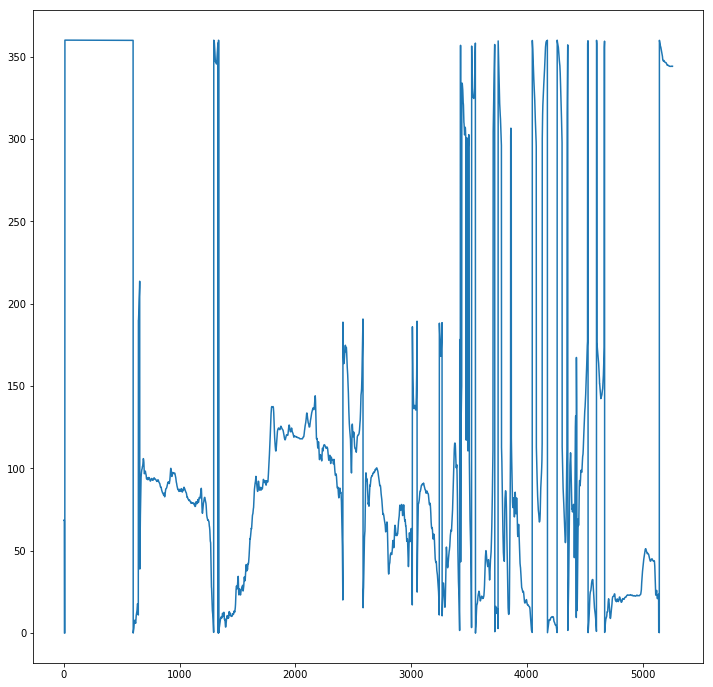

In [243]:
plt.plot(alpha)
plt.show()

In [250]:
t2 = takeShot()

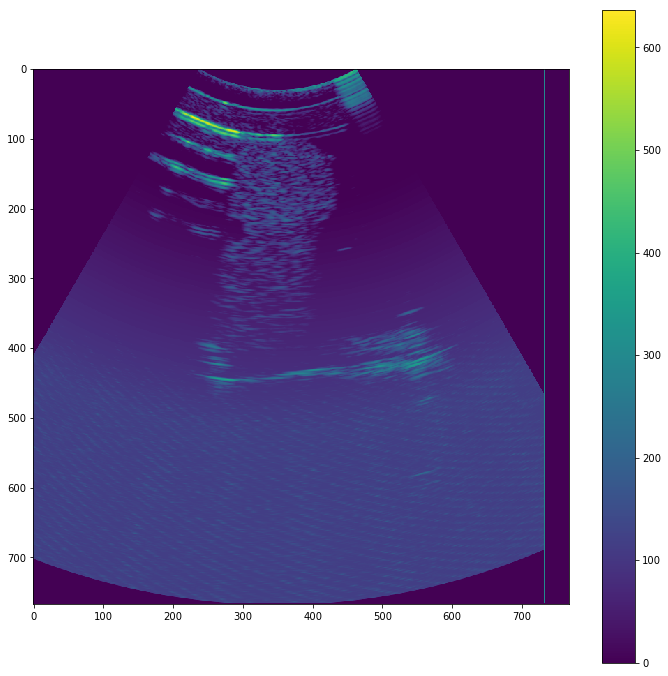

In [252]:
show(t2)

In [254]:

findCorrespondance(t1, t2)

array([[ 0.84788601,  0.81749855,  0.74447835, ...,  0.63901631,
         0.64980286,  0.65594412],
       [ 0.81057896,  0.85245606,  0.789181  , ...,  0.66244903,
         0.68010278,  0.68197286],
       [ 0.76664061,  0.80628625,  0.85265315, ...,  0.67147742,
         0.68443247,  0.68612952],
       ..., 
       [ 0.6772498 ,  0.68629438,  0.66922513, ...,  0.77146352,
         0.78005192,  0.76914215],
       [ 0.67744498,  0.68197228,  0.67204333, ...,  0.76595262,
         0.79458911,  0.79007933],
       [ 0.67630821,  0.6783107 ,  0.67160221, ...,  0.75401479,
         0.79495136,  0.81029985]])

In [258]:
vals2 = findCorrespondance(t2, t1)

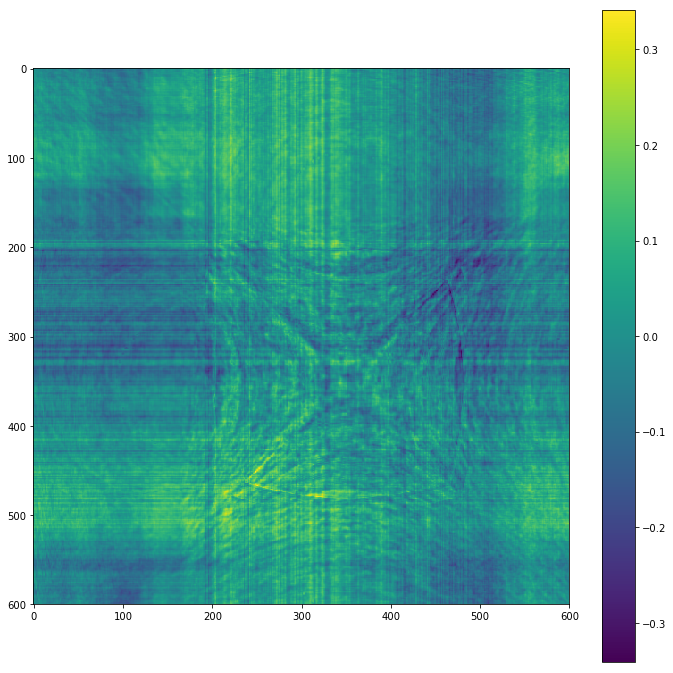

In [259]:
show(vals - vals2)

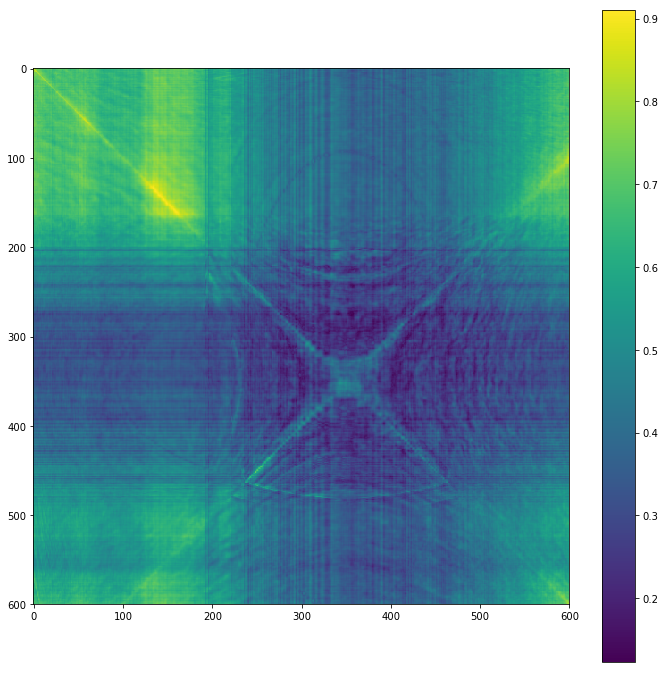

In [260]:
show(vals)

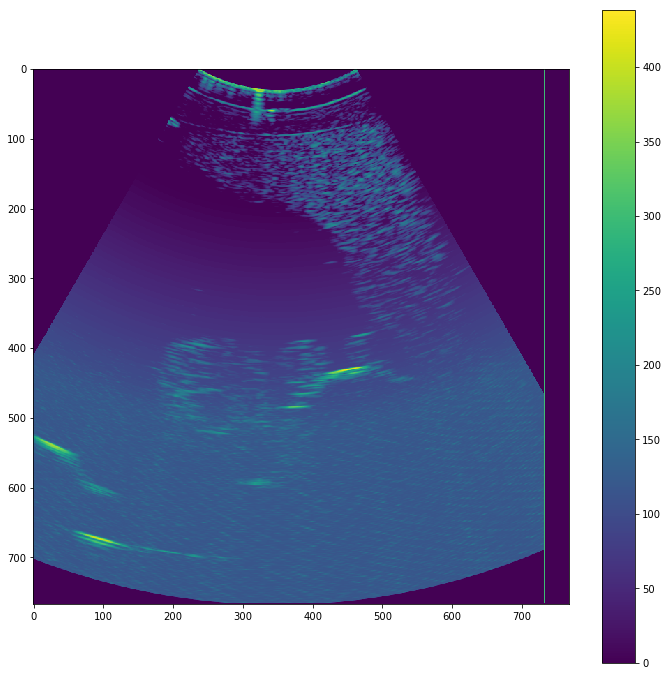

In [261]:
show(t1)

In [263]:
np.argmax(vals - vals2)

280451

In [269]:
w2 = takeShot()


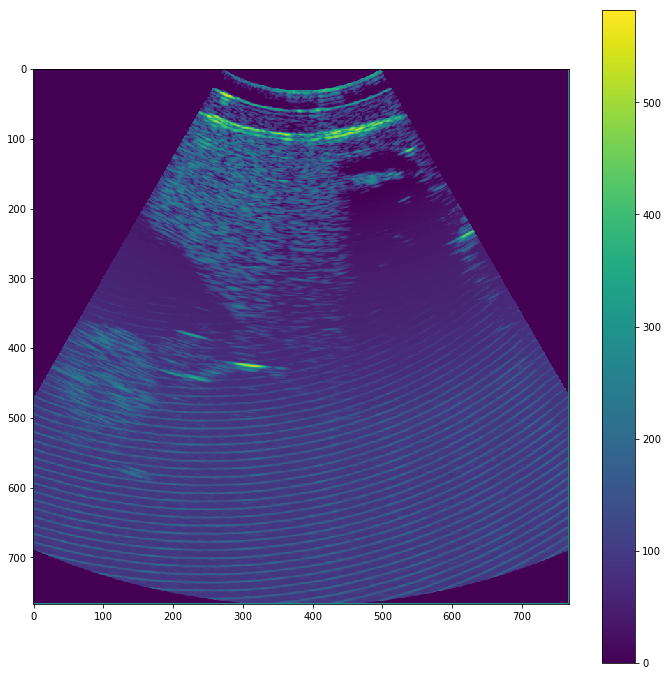

In [270]:
show(w2)

In [271]:
vals1 = findCorrespondance(w1, w2)
vals2 = findCorrespondance(w2, w1)

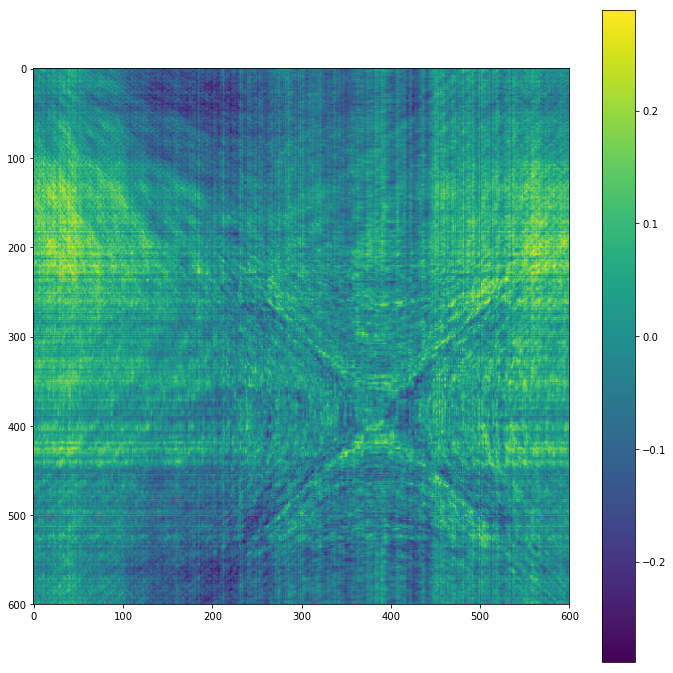

In [274]:
show(vals2 - vals1)

In [336]:
wh1 = fft.fft2(w1[:-200:6, ::6])
wh2 = fft.fft2(w1[200::6, ::6])
thing = wh1 * np.conjugate(wh2)
res = fft.ifft2(thing / np.abs(thing))

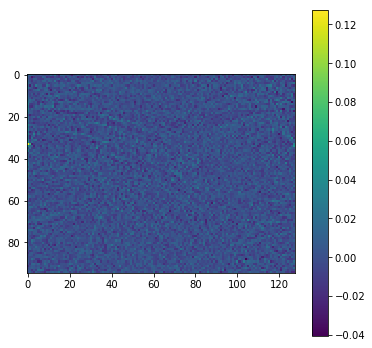

In [337]:
show(np.real(res))

In [298]:
v1 = takeVideo(400)

In [299]:
v2 = takeVideo(400)

In [304]:
orientations = pickle.load(open("C:/d/pythonGames/phoneGyroTrack/1498686182.5569956", "rb"))

In [306]:
pickle.dump((v1, v2, orientations), open("", "wb"))

In [302]:
plt.plot(v1[0])

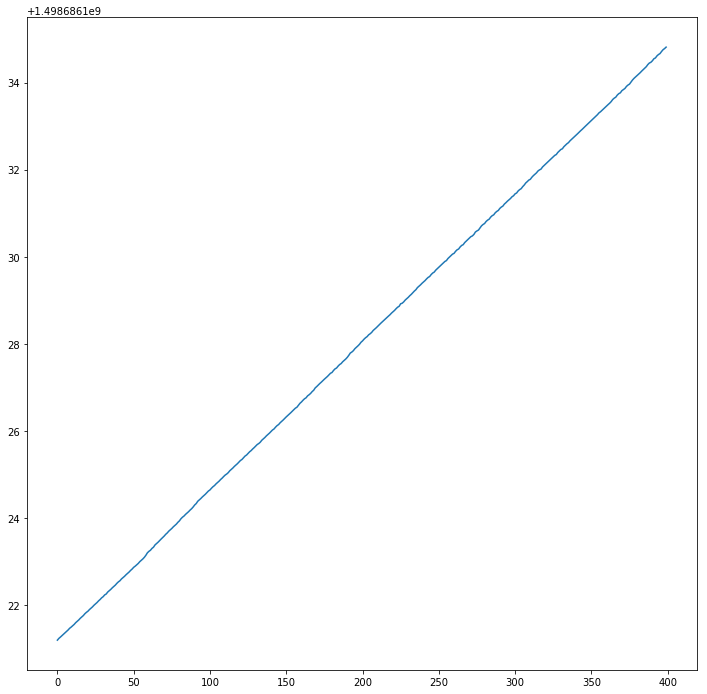

In [303]:
plt.show()

In [307]:
orientations

[{'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686050.987},
 {'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686051.003},
 {'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686051.02},
 {'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686051.036},
 {'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686051.052},
 {'alpha': 359.2826757636896,
  'beta': 63.73944105744838,
  'gamma': 1.0947862337059742,
  'time': 1498686051.07},
 {'alpha': 358.80568967806755,
  'beta': 61.28868779126302,
  'gamma': 2.001958440982867,
  'time': 1498686051.086},
 {'alpha': 358.86001025953504,
  'beta': 61.81159976224455,
  'gamma': 1.9505904984780338,
  'time': 1498686051.103},
 {'alpha': 358.92935471206835,
  'beta': 61.916402700150094,
  'g

In [308]:
matplotlib.rcParams["figure.figsize"] = [6, 6]

In [313]:
alpha, beta, gamma, otime = [np.array([o[name] for o in orientations]) for name in ("alpha", "beta", "gamma", "time")]

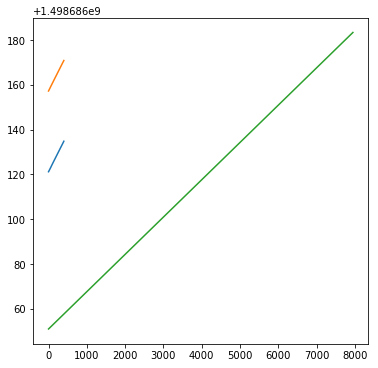

In [318]:
plt.plot(v1[0])
plt.plot(v2[0])
plt.plot(otime)
plt.show()

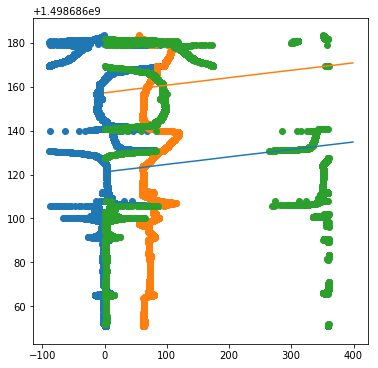

In [329]:
plt.scatter(gamma, otime)
plt.scatter(beta, otime)
plt.scatter(alpha, otime)

plt.plot(v1[0])
plt.plot(v2[0])

plt.show()

In [339]:
def angletomatrix(alpha, beta, gamma):
    _a = alpha
    _x = beta
    _y = gamma
    cX = np.cos(_x)
    cY = np.cos(_y)
    cZ = np.cos(_z)
    sX = np.sin(_x)
    sY = np.sin(_y)
    sZ = np.sin(_z)
    
    out = np.zeros(9)
    
    out[0] = cZ * cY + sZ * sX * sY
    out[1] = cX * sZ
    out[2] = - cZ * sY + sZ * sX * cY
    
    out[3] = - cY * sZ + cZ * sX * sY
    out[4] = cZ * cX
    out[5] = sZ * sY + cZ * cY * sX

    out[6] = cX * sY
    out[7] = - sX
    out[8] = cX * cY  
    
    
    #I am a bad programmer. Source:
    #https://stackoverflow.com/questions/36639182/html5-get-device-orientation-rotation-in-relative-coordinate
    
    return out.reshape(3, 3)


In [340]:
ls

 Volume in drive C is OS
 Volume Serial Number is 1205-743A

 Directory of c:\d\ultrasoundHacks

06/30/2017  01:27 PM    <DIR>          .
06/30/2017  01:27 PM    <DIR>          ..
06/27/2017  01:27 PM    <DIR>          .ipynb_checkpoints
06/28/2017  05:48 PM     1,415,996,922 June 28 data.pickle
06/30/2017  01:27 PM         6,742,673 Untitled.ipynb
06/27/2017  01:40 PM       707,788,968 video1
               3 File(s)  2,130,528,563 bytes
               3 Dir(s)  880,487,682,048 bytes free
